## **Histogram Equalization**

This program demonstrates how to perform **histogram equalization**


In [16]:
import matplotlib.pyplot as plt

### Step 1: Making an example 8×8 grayscale image

We'll represent our image as an 8×8 array,  
where each value is a pixel intensity between **0 and 255**.


In [17]:
image1 = [
    [52, 55, 61, 59, 79, 61, 76, 61],
    [62, 59, 55, 104, 94, 85, 59, 71],
    [63, 65, 66, 113, 144, 104, 63, 72],
    [64, 70, 70, 126, 154, 109, 71, 69],
    [67, 73, 68, 106, 122, 88, 68, 68],
    [68, 79, 60, 70, 77, 66, 58, 75],
    [69, 85, 64, 58, 55, 61, 65, 83],
    [70, 87, 69, 68, 65, 73, 78, 90]
]

# Image 2 — low contrast (values clustered in midrange)
image2 = [
    [110, 112, 113, 115, 118, 116, 114, 113],
    [111, 113, 114, 116, 117, 118, 115, 114],
    [112, 113, 114, 115, 116, 117, 118, 117],
    [113, 114, 115, 116, 117, 118, 118, 117],
    [114, 115, 116, 117, 118, 117, 116, 115],
    [115, 116, 117, 118, 117, 116, 115, 114],
    [116, 117, 118, 117, 116, 115, 114, 113],
    [117, 118, 117, 116, 115, 114, 113, 112]
]


### Step 2: Compute the histogram

We will count how many pixels have each possible intensity value (0–255).  


In [18]:
def compute_histogram(img):
    hist = [0] * 256  # 256 for intensity values 0–255
    for row in img:
        for pixel in row:
            hist[pixel] += 1
    return hist


### Step 3: Compute the Cumulative Histogram (CDF)

The **cumulative distribution function (CDF)** sums the histogram values from 0 up to each intensity.  
It tells us how many pixels have brightness less than or equal to a given value.


In [19]:
def cumulative_histogram(hist):
    cdf = [0] * len(hist)
    cumulative = 0
    for i in range(len(hist)):
        cumulative += hist[i]
        cdf[i] = cumulative
    return cdf



### Step 4: Apply Histogram Equalization

We now redistribute pixel intensities to span the full range (0–255) more evenly.  
The formula used is:

Cnew​=round(N−CDFmin​CDF(C)−CDFmin​​×255)

Where:
- \( CDF(C) \) = cumulative value for intensity \( C \)
- \( CDF_{min} \) = first nonzero CDF value
- \( N \) = total number of pixels


In [20]:
def equalize_image(img, cdf):
    # Find the smallest non-zero CDF value
    cdf_min = min(v for v in cdf if v > 0)
    total_pixels = len(img) * len(img[0])

    # Create a lookup table for new pixel values
    new_values = [0] * 256
    for i in range(256):
        new_values[i] = round((cdf[i] - cdf_min) / (total_pixels - cdf_min) * 255)
        if new_values[i] < 0:
            new_values[i] = 0

    # Apply the new mapping to the image
    new_img = []
    for row in img:
        new_row = [new_values[p] for p in row]
        new_img.append(new_row)
    return new_img, new_values



### Step 5: Compute Histogram of Equalized Image

We’ll compute the histogram again after equalization  
to see how pixel values are now more evenly distributed.


In [21]:
# Process Image 1
hist1 = compute_histogram(image1)
cdf1 = cumulative_histogram(hist1)
equalized1, _ = equalize_image(image1, cdf1)
hist1_eq = compute_histogram(equalized1)

# Process Image 2
hist2 = compute_histogram(image2)
cdf2 = cumulative_histogram(hist2)
equalized2, _ = equalize_image(image2, cdf2)
hist2_eq = compute_histogram(equalized2)


### Step 6: Visualize Results with Matplotlib

We'll display:
- Original and equalized images (as 8×8 grayscale matrices)
- Their histograms before and after equalization


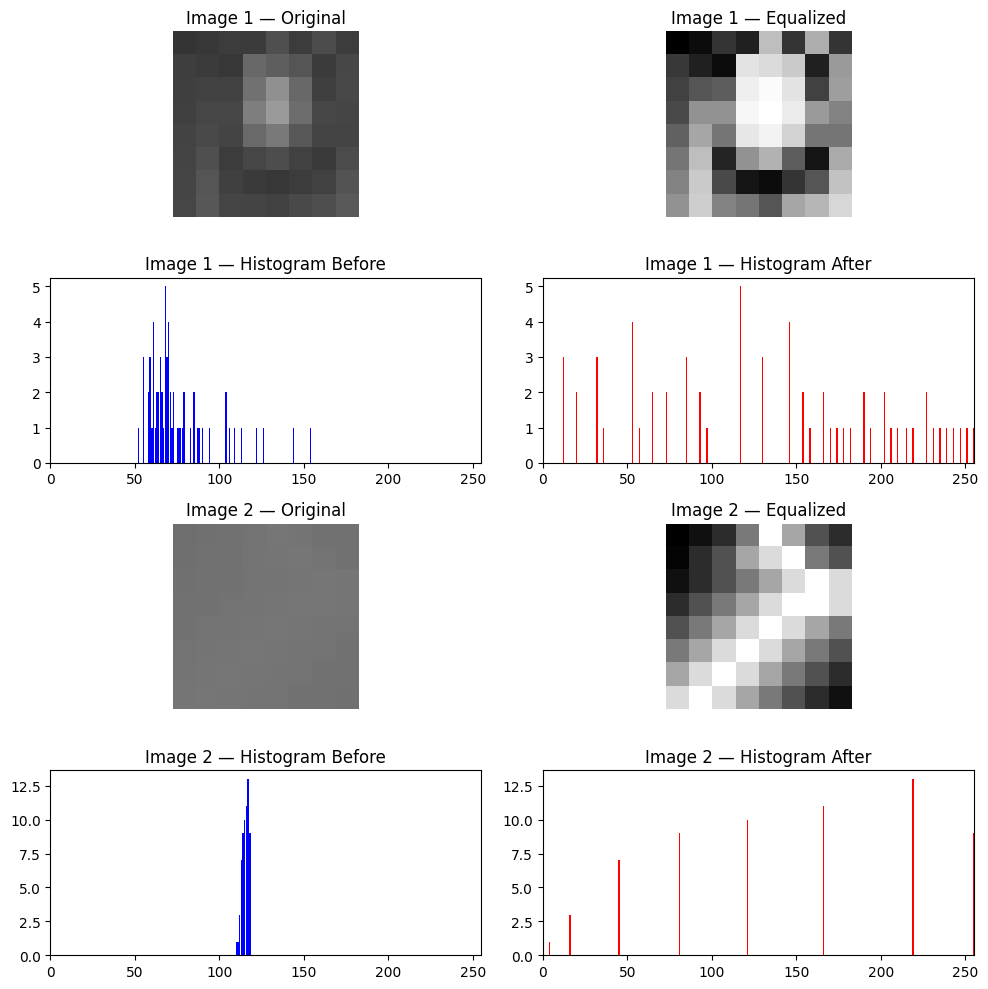

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# Image 1 visuals
axes[0, 0].imshow(image1, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("Image 1 — Original")
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized1, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title("Image 1 — Equalized")
axes[0, 1].axis('off')

axes[1, 0].bar(range(256), hist1, color='blue')
axes[1, 0].set_title("Image 1 — Histogram Before")
axes[1, 0].set_xlim(0, 255)

axes[1, 1].bar(range(256), hist1_eq, color='red')
axes[1, 1].set_title("Image 1 — Histogram After")
axes[1, 1].set_xlim(0, 255)

# Image 2 visuals
axes[2, 0].imshow(image2, cmap='gray', vmin=0, vmax=255)
axes[2, 0].set_title("Image 2 — Original")
axes[2, 0].axis('off')

axes[2, 1].imshow(equalized2, cmap='gray', vmin=0, vmax=255)
axes[2, 1].set_title("Image 2 — Equalized")
axes[2, 1].axis('off')

axes[3, 0].bar(range(256), hist2, color='blue')
axes[3, 0].set_title("Image 2 — Histogram Before")
axes[3, 0].set_xlim(0, 255)

axes[3, 1].bar(range(256), hist2_eq, color='red')
axes[3, 1].set_title("Image 2 — Histogram After")
axes[3, 1].set_xlim(0, 255)

plt.tight_layout()
plt.show()
